In [1]:
import pandas as pd
import numpy as np
import json
import os

In [2]:
def read_as_pd(experiment_name):
    # Read
    with open(f'./experiments/{experiment_name}/res.json', 'r') as file:
        result_json = json.load(file)
    
    # Initialize a 2D array
    nodes = list(result_json.keys())
    metrics = set()
    for metrics_dict in result_json.values():
        metrics.update(metrics_dict.keys())
    metrics = [m for m in metrics if m != "attack_type"]
    
    data = np.empty((len(nodes), len(metrics)), dtype=object)
    
    # Populate the 2D array
    for i, node in enumerate(nodes):
        for j, metric in enumerate(metrics):
            if metric in result_json[node]:
                data[i, j] = result_json[node][metric]
            else:
                data[i, j] = None
    
    # To DataFrame
    df = pd.DataFrame(data, index=nodes, columns=metrics)
    
    return df

# 示例调用

experiment_name = "TrialRun_10_clients_alpha_5_MNIST_fully_fedep_no_attack_0_dynamic_topo_False_dynamic_agg_False_dynamic_data_False_is_proactive_False22_06_2024_14_25_57"

df = read_as_pd(experiment_name)
print(df.shape)
print(df.head(5))

(10, 18)
                           Test/F1Score_after_aggregation  \
node_0  [0.920656442642212, 0.9292833805084229, 0.9369...   
node_6  [0.852521538734436, 0.8752766847610474, 0.8593...   
node_1  [0.8297268152236938, 0.8582358956336975, 0.788...   
node_7  [0.8741881251335144, 0.927797555923462, 0.9241...   
node_9  [0.9172909259796144, 0.935849130153656, 0.9391...   

                              Test/Loss_after_aggregation  \
node_0  [0.920656442642212, 0.9292833805084229, 0.9369...   
node_6  [0.852521538734436, 0.8752766847610474, 0.8593...   
node_1  [0.8297268152236938, 0.8582358956336975, 0.788...   
node_7  [0.8741881251335144, 0.927797555923462, 0.9241...   
node_9  [0.9172909259796144, 0.935849130153656, 0.9391...   

                                ValidationEpoch/Precision  \
node_0  [0.7777591347694397, 0.8826969861984253, 0.910...   
node_6  [0.7850180864334106, 0.8359365463256836, 0.901...   
node_1  [0.6686570644378662, 0.8043363094329834, 0.817...   
node_7  [0.69

In [ ]:
experiment_name = "10_clients_alpha_20_MNIST_fully_fed_avg_no_attack_0_dynamic_topo_False_dynamic_agg_False_dynamic_data_False_is_proactive_False22_06_2024_04_10_06"

df = read_as_pd(experiment_name)
print(df.shape)
print(df.head(5))

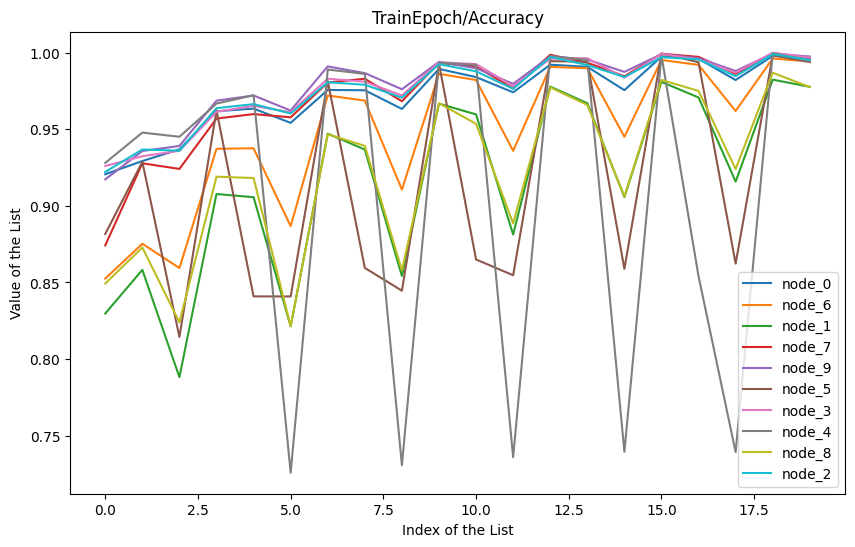

In [4]:
import matplotlib.pyplot as plt

# Assuming df is already defined and contains the DataFrame with the required structure

# Extract the index (nodes) and the first column (TrainEpoch/Accuracy)
nodes = df.index
data = df.iloc[:, 0].values.tolist()  # Convert to list for easier plotting

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each line with its own legend
for i, node in enumerate(nodes):
    plt.plot(data[i][:20], label=node)

# Add labels and title
plt.xlabel('Index of the List')
plt.ylabel('Value of the List')
plt.title('TrainEpoch/Accuracy')
plt.legend()

# Show plot
plt.show()